In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_file = "/kaggle/input/sign_mnist/sign_mnist_train.csv"
test_file = "/kaggle/input/sign_mnist/sign_mnist_test.csv"
train_data=pd.read_csv(train_file)
test_data=pd.read_csv(test_file)
X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=42)
X=X_train.drop("label",axis=1)
Y=X_train["label"]
X_valid=X_val.drop("label",axis=1)
Y_valid=X_val["label"]

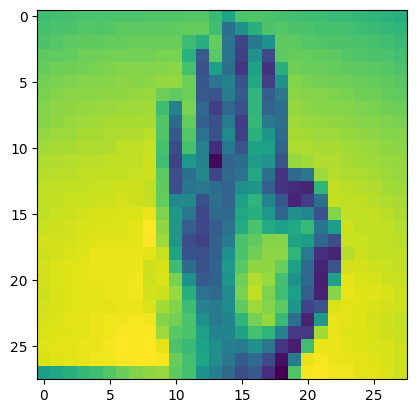

In [41]:
image = X.iloc[7].values
image_reshape = image.reshape(28,28)
image1 = tf.convert_to_tensor(image_reshape)
plt.imshow(image1)
# image1.shape

In [32]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[784]),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(26,activation='linear'),
])

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                        

Epoch 1/100
687/687 [==============================] - 2s 3ms/step - loss: 0.6720 - accuracy: 0.8258 - val_loss: 0.0859 - val_accuracy: 0.9825
Epoch 2/100
687/687 [==============================] - 2s 3ms/step - loss: 0.1423 - accuracy: 0.9628 - val_loss: 0.0328 - val_accuracy: 0.9909
Epoch 3/100
687/687 [==============================] - 2s 2ms/step - loss: 0.0862 - accuracy: 0.9756 - val_loss: 0.0414 - val_accuracy: 0.9902
Epoch 4/100
687/687 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.9804 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 5/100
687/687 [==============================] - 2s 2ms/step - loss: 0.0517 - accuracy: 0.9853 - val_loss: 0.0280 - val_accuracy: 0.9913
Epoch 6/100
687/687 [==============================] - 2s 3ms/step - loss: 0.0536 - accuracy: 0.9839 - val_loss: 0.0312 - val_accuracy: 0.9913
Epoch 7/100
687/687 [==============================] - 2s 2ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0156 - val_accuracy: 0.9958

<Axes: >

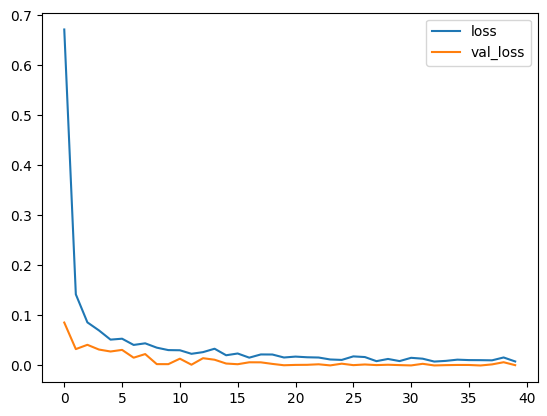

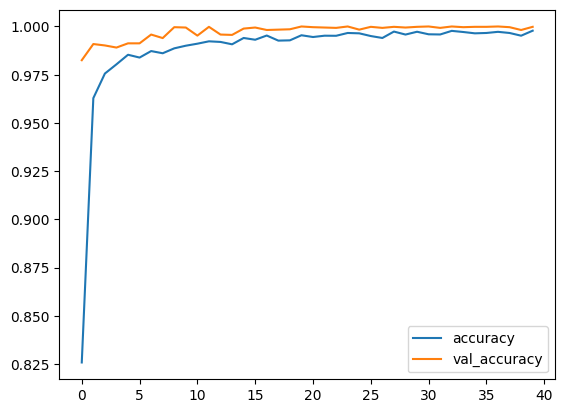

In [35]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=100,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [36]:
test_data_predict = test_data.drop("label", axis=1)
test_data_result = test_data["label"]
pred=model.predict(test_data_predict)
prediction = np.array([np.argmax(x) for x in pred])

225/225 [==============================] - 0s 704us/step


In [37]:
prediction

array([ 6,  5, 10, ...,  2,  4,  2])

In [38]:
accuracy = model.evaluate(test_data_predict, test_data_result)
print(f'Test accuracy: {accuracy*100}%')

225/225 [==============================] - 0s 722us/step - loss: 0.8333 - accuracy: 0.8360
Test accuracy: [0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.8333428502082825, 0.8360289931297302, 0.83334285020

In [40]:
model.save("mymodel.keras1")

INFO:tensorflow:Assets written to: mymodel.keras1/assets


INFO:tensorflow:Assets written to: mymodel.keras1/assets
